### Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import seaborn as sns
pd.set_option('display.max_columns', None)

### Reading files

#### Reading industry names

In [2]:
df= pd.read_csv("sp_500_sector.csv")
del df['Unnamed: 0']
df=df.rename(columns={'Instrument':"Symbol"})
df

,Symbol,GICS Sector Name
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV.K,Health Care
4,ABMD.O,Health Care
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA.O,Information Technology
500,ZBH,Health Care
501,ZION.O,Financials


### Profibility variables

#### ROA (Return on assets )

In [3]:
return_on_assets=pd.read_csv("sp_500_return_on_assets_actual.csv")
del return_on_assets['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
return_on_assets.loc[:,cols] = return_on_assets.loc[:,cols].fillna(method='ffill', axis = 1)
return_on_assets.loc[:,cols] = return_on_assets.loc[:,cols].fillna(method='bfill', axis = 1)
return_on_assets = return_on_assets.fillna(0)
return_on_assets

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,12.539,11.060,13.090,16.900,15.850,15.350
1,AOS,14.679,11.290,12.070,14.440,14.440,14.440
2,ABT,12.680,9.330,8.599,7.150,6.830,6.990
3,ABBV.K,15.279,14.839,17.949,18.880,13.170,13.270
4,ABMD.O,12.849,12.849,12.849,12.849,12.849,12.849
...,...,...,...,...,...,...,...
498,YUM,22.830,20.100,23.740,22.070,19.500,14.480
499,ZBRA.O,17.170,13.680,15.600,13.880,8.510,6.060
500,ZBH,6.480,4.820,6.670,6.240,6.170,6.000
501,ZION.O,1.260,0.670,1.130,1.260,0.930,0.780


#### Return on Equity (ROE)

In [4]:
return_on_equity = pd.read_csv("sp_500_return_on_equity_actual.csv")
del return_on_equity['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
return_on_equity.loc[:,cols] = return_on_equity.loc[:,cols].fillna(method='ffill', axis = 1)
return_on_equity.loc[:,cols] = return_on_equity.loc[:,cols].fillna(method='bfill', axis = 1)
return_on_equity = return_on_equity.fillna(0)
return_on_equity

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,42.219,44.130,53.310,58.94,51.17,46.310
1,AOS,26.469,19.980,21.870,26.72,23.91,22.080
2,ABT,27.310,20.519,18.859,16.71,17.11,15.720
3,ABBV.K,143.719,197.780,-160.360,-160.36,185.16,184.221
4,ABMD.O,14.369,18.840,21.670,28.94,16.97,13.450
...,...,...,...,...,...,...,...
498,YUM,-16.590,-14.010,-13.940,-14.61,-17.55,-41.300
499,ZBRA.O,38.810,34.650,44.490,55.14,46.62,34.780
500,ZBH,12.470,9.610,13.740,13.61,15.27,16.540
501,ZION.O,14.330,6.630,10.470,11.57,8.59,5.950


#### Return on Investment Capital (ROIC)

In [5]:
return_on_investment_capital = pd.read_csv("sp_500_return_on_invested_capital_actual.csv")
del return_on_investment_capital['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
return_on_investment_capital.loc[:,cols] = return_on_investment_capital.loc[:,cols].fillna(method='ffill', axis = 1)
return_on_investment_capital.loc[:,cols] = return_on_investment_capital.loc[:,cols].fillna(method='bfill', axis = 1)
return_on_investment_capital = return_on_investment_capital.fillna(0)
return_on_investment_capital

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,20.75,20.75,20.820,30.74,27.530,27.07
1,AOS,25.94,25.94,25.940,25.94,25.940,25.94
2,ABT,21.70,21.70,8.539,12.36,12.090,12.99
3,ABBV.K,30.33,21.50,21.500,54.57,30.400,25.17
4,ABMD.O,0.00,0.00,0.000,0.00,0.000,0.00
...,...,...,...,...,...,...,...
498,YUM,72.35,74.62,85.830,80.85,77.820,47.56
499,ZBRA.O,27.83,24.56,24.890,24.89,24.890,24.89
500,ZBH,10.48,7.09,9.300,9.49,9.260,12.26
501,ZION.O,0.00,0.00,0.000,0.00,0.000,0.00


#### EBITDA

In [6]:
ebitda = pd.read_csv("sp_500_ebitda.csv")
del ebitda['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
ebitda.loc[:,cols] = ebitda.loc[:,cols].fillna(method='ffill', axis = 1)
ebitda.loc[:,cols] = ebitda.loc[:,cols].fillna(method='bfill', axis = 1)
ebitda = ebitda.fillna(0)
ebitda

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,9.408000e+09,8.941000e+09,8.661000e+09,8.283000e+09,8.742000e+09,8.393000e+09
1,AOS,7.078000e+08,5.389000e+08,5.614000e+08,6.448000e+08,6.010000e+08,5.349000e+08
2,ABT,1.212600e+10,8.757000e+09,7.684000e+09,7.008000e+09,4.892000e+09,4.411000e+09
3,ABBV.K,2.805300e+10,1.959800e+10,1.555700e+10,1.418000e+10,1.174700e+10,1.079200e+10
4,ABMD.O,2.637950e+08,2.536540e+08,2.696490e+08,2.389330e+08,1.681420e+08,9.634000e+07
...,...,...,...,...,...,...,...
498,YUM,2.319000e+09,1.931000e+09,2.086000e+09,1.959000e+09,1.940000e+09,1.847000e+09
499,ZBRA.O,1.198000e+09,8.310000e+08,8.990000e+08,8.040000e+08,6.510000e+08,5.900000e+08
500,ZBH,2.377100e+09,1.991100e+09,2.549900e+09,2.520600e+09,2.758600e+09,2.483100e+09
501,ZION.O,8.350000e+08,8.350000e+08,1.438000e+09,1.457000e+09,1.183000e+09,8.660660e+08


### Equity Variables

#### Diluted earnings per share (EPS)

In [7]:
eps=pd.read_csv("sp_500_diluted_eps.csv")
del eps['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
eps.loc[:,cols] = eps.loc[:,cols].fillna(method='ffill', axis = 1)
eps.loc[:,cols] = eps.loc[:,cols].fillna(method='bfill', axis = 1)
eps = eps.fillna(0)
eps

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,10.11618,9.35933,7.72005,8.88538,7.92884,8.16228
1,AOS,3.01947,2.12110,2.21941,2.57965,1.69812,1.84646
2,ABT,3.95249,2.51680,2.07019,1.33785,0.27273,0.94403
3,ABBV.K,6.45357,2.72325,5.28437,3.65912,3.29570,3.63151
4,ABMD.O,2.97520,4.93771,4.43096,5.61236,2.44651,1.16700
...,...,...,...,...,...,...,...
498,YUM,5.21523,2.94463,4.13419,4.68693,3.77465,4.10750
499,ZBRA.O,15.52806,9.34835,10.07571,7.75325,0.31664,-2.65611
500,ZBH,1.90875,-0.67101,5.47460,-1.86339,8.90427,1.51136
501,ZION.O,6.79007,3.02512,4.16077,4.08230,2.59953,1.99252


#### Dividend per Share (DPS)

In [8]:
dps= pd.read_csv("sp_500_dividend_per_share.csv")
del dps['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
dps.loc[:,cols] = dps.loc[:,cols].fillna(method='ffill', axis = 1)
dps.loc[:,cols] = dps.loc[:,cols].fillna(method='bfill', axis = 1)
dps = dps.fillna(0)
dps

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,5.920,5.88,5.76,5.440,4.700,4.44
1,AOS,0.800,0.98,0.90,0.760,0.560,0.48
2,ABT,1.800,1.44,1.28,1.120,1.060,1.04
3,ABBV.K,5.200,4.72,4.28,3.590,2.560,2.35
4,ABMD.O,0.000,0.00,0.00,0.000,0.000,0.00
...,...,...,...,...,...,...,...
498,YUM,2.000,1.88,1.68,1.440,0.900,1.73
499,ZBRA.O,0.000,0.00,0.00,0.000,0.000,0.00
500,ZBH,0.960,0.96,0.96,0.960,0.960,0.96
501,ZION.O,1.440,1.36,1.28,1.040,0.440,0.28


#### Dividend Yield (DY)

In [9]:
DY= pd.read_csv("sp_500_dividend_yield.csv")
del DY['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
DY.loc[:,cols] = DY.loc[:,cols].fillna(method='ffill', axis = 1)
DY.loc[:,cols] = DY.loc[:,cols].fillna(method='bfill', axis = 1)
DY = DY.fillna(0)
DY

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,3.332770,3.364037,3.264936,2.855044,1.996856,1.996856
1,AOS,1.304601,1.897118,2.015113,2.060890,0.913838,0.913838
2,ABT,1.335797,1.643986,1.657840,1.769667,1.962502,1.962502
3,ABBV.K,4.165436,4.853010,5.330924,4.642586,2.936615,2.936615
4,ABMD.O,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
498,YUM,1.440300,1.731761,1.667825,1.566580,1.470408,1.470408
499,ZBRA.O,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
500,ZBH,0.755668,0.623013,0.641368,0.925569,0.795558,0.795558
501,ZION.O,2.406586,3.130755,2.619414,2.945508,1.259099,1.259099


#### Price to earning ratio (PER)

In [10]:
per= pd.read_csv("sp_500_pe.csv")
del per['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
per.loc[:,cols] = per.loc[:,cols].fillna(method='ffill', axis = 1)
per.loc[:,cols] = per.loc[:,cols].fillna(method='bfill', axis = 1)
per = per.fillna(0)
per

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,17.396337,20.285993,21.113857,20.975434,26.272814,22.491709
1,AOS,29.735721,28.252926,19.824311,17.485381,30.103111,25.920776
2,ABT,34.685699,58.247107,46.956428,54.793379,47.052519,57.765479
3,ABBV.K,32.229654,23.428037,39.643238,18.154678,23.489379,16.947960
4,ABMD.O,110.435013,71.164378,35.625009,70.750384,92.201652,116.988694
...,...,...,...,...,...,...,...
498,YUM,26.782132,31.582193,27.995486,15.409013,46.068564,20.398500
499,ZBRA.O,37.959208,43.718427,28.293506,22.690481,182.313164,182.313164
500,ZBH,30.893825,30.893825,30.893825,42.876629,36.513243,56.091240
501,ZION.O,8.909000,18.545399,12.144916,10.810122,19.023702,23.629785


#### Enterprise Value (EV)

In [11]:
EV= pd.read_csv("sp_500_enterprise_value.csv")
del EV['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
EV.loc[:,cols] = EV.loc[:,cols].fillna(method='ffill', axis = 1)
EV.loc[:,cols] = EV.loc[:,cols].fillna(method='bfill', axis = 1)
EV = EV.fillna(0)
EV

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,1.140789e+11,1.159227e+11,1.133481e+11,1.212466e+11,1.484903e+11,1.171449e+11
1,AOS,1.310427e+10,8.475563e+09,7.595054e+09,6.851405e+09,1.023664e+10,7.911191e+09
2,ABT,2.577897e+11,2.080969e+11,1.685721e+11,1.432366e+11,1.123481e+11,6.015241e+10
3,ABBV.K,3.078700e+11,2.682620e+11,1.586929e+11,1.703967e+11,1.826317e+11,1.311237e+11
4,ABMD.O,1.569077e+10,1.412873e+10,7.250479e+09,1.423522e+10,8.039312e+09,4.671926e+09
...,...,...,...,...,...,...,...
498,YUM,5.102246e+10,4.279609e+10,4.041701e+10,3.828078e+10,3.643905e+10,2.959046e+10
499,ZBRA.O,3.247680e+10,2.201909e+10,1.528051e+10,1.043291e+10,7.918029e+09,7.151904e+09
500,ZBH,3.312947e+10,3.926842e+10,3.862424e+10,2.983542e+10,3.437673e+10,3.176492e+10
501,ZION.O,1.132423e+10,9.713664e+09,1.444148e+10,1.253762e+10,1.518498e+10,1.061042e+10


#### Price to sales per share ratio

In [12]:
price_to_sales= pd.read_csv("sp_500_price_to_sale_per_share.csv")
del price_to_sales['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
price_to_sales.loc[:,cols] = price_to_sales.loc[:,cols].fillna(method='ffill', axis = 1)
price_to_sales.loc[:,cols] = price_to_sales.loc[:,cols].fillna(method='bfill', axis = 1)
price_to_sales = price_to_sales.fillna(0)
price_to_sales

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,2.875415,3.179323,3.174042,3.348389,4.522786,3.570844
1,AOS,4.045136,3.148153,2.544169,2.308176,3.600520,3.134436
2,ABT,5.882308,6.022652,4.898997,4.178527,3.952259,2.730897
3,ABBV.K,4.338868,4.652742,3.983903,4.308376,5.660936,4.031523
4,ABMD.O,16.783839,18.262072,9.381871,21.218041,16.420549,12.673438
...,...,...,...,...,...,...,...
498,YUM,6.323514,5.844921,5.579018,5.030101,16.045539,3.744556
499,ZBRA.O,5.814338,4.730170,3.113885,2.088607,1.517600,1.263521
500,ZBH,3.608312,4.385804,3.767520,2.588123,3.065264,2.637069
501,ZION.O,4.349574,2.913973,3.287698,3.278736,4.762707,4.552200


#### Price to book value (PBV)

In [13]:
pbv= pd.read_csv("sp_500_price_to_book_per_share.csv")
del pbv['Unnamed: 0']
cols = ['2021', '2020','2019', '2018', '2017','2016']
pbv.loc[:,cols] = pbv.loc[:,cols].fillna(method='ffill', axis = 1)
pbv.loc[:,cols] = pbv.loc[:,cols].fillna(method='bfill', axis = 1)
pbv = pbv.fillna(0)
pbv

,Symbol,2021,2020,2019,2018,2017,2016
0,MMM,7.078823,8.486759,9.479577,10.826404,11.541930,8.948830
1,AOS,7.322928,5.094843,4.837038,4.173793,6.380035,5.459306
2,ABT,7.229932,6.182880,4.827861,4.137293,3.101151,2.721958
3,ABBV.K,17.665022,12.387120,-15.916772,-47.472968,23.083756,15.729126
4,ABMD.O,11.802279,12.390433,7.783810,18.461724,13.694594,12.254841
...,...,...,...,...,...,...,...
498,YUM,-5.197306,-4.140058,-3.769444,-3.857731,-4.519815,-12.559114
499,ZBRA.O,11.298247,10.608077,8.149821,7.062650,6.782803,6.055491
500,ZBH,2.025853,2.610173,2.471114,1.680204,2.267403,2.056679
501,ZION.O,1.271731,0.929128,1.178022,1.036537,1.307997,1.142513


### ESG SCORES

In [14]:
esg_scores= pd.read_csv("sp_500_esg_scores_2016_to_2021.csv")
del esg_scores['Unnamed: 0']
esg_scores=esg_scores.rename(columns={'Instrument':"Symbol"})
cols = ['2021', '2020','2019', '2018', '2017','2016']
esg_scores.loc[:,cols] = esg_scores.loc[:,cols].fillna(method='ffill', axis = 1)
esg_scores.loc[:,cols] = esg_scores.loc[:,cols].fillna(method='bfill', axis = 1)
esg_scores = esg_scores.fillna(0)
esg_scores

,Symbol,2016,2017,2018,2019,2020,2021
0,MMM,88.128389,87.233512,85.984531,88.540146,92.732718,89.862822
1,AOS,39.338609,40.234916,41.063622,53.695534,53.966301,53.966301
2,ABT,79.345189,81.993237,77.683987,80.952100,82.965995,82.203654
3,ABBV.K,75.116025,79.487007,75.537190,78.774658,81.510916,82.819108
4,ABMD.O,21.013227,25.892601,20.548131,20.890800,25.319605,25.963587
...,...,...,...,...,...,...,...
498,YUM,64.074647,78.807757,82.363311,72.703976,78.144823,77.756865
499,ZBRA.O,26.308357,29.382888,24.933099,33.306346,42.941130,42.941130
500,ZBH,45.966653,40.606044,45.582277,63.744334,62.925379,68.032669
501,ZION.O,35.764204,35.879043,38.087569,45.462987,54.258814,51.913269


# Finding Correlation for Profitability Variables

### Merging the  dataframe based on symbols

In [15]:
df1=pd.merge(return_on_assets,return_on_equity,on=['Symbol'])
df1=df1.rename(columns={"2021_x":"ROA_2021","2020_x":"ROA_2020","2019_x":"ROA_2019","2018_x":"ROA_2018",
                        "2017_x":"ROA_2017","2016_x":"ROA_2016","2021_y":"ROE_2021","2020_y":"ROE_2020","2019_y":"ROE_2019",
                        "2018_y":"ROE_2018",
                        "2017_y":"ROE_2017","2016_y":"ROE_2016"})
df2=pd.merge(df1,return_on_investment_capital,on="Symbol")
df2=df2.rename(columns={"2021":"ROIC_2021","2020":"ROIC_2020","2019":"ROIC_2019","2018":"ROIC_2018","2017":"ROIC_2017","2016":"ROIC_2016"})
df3=pd.merge(df2,ebitda,on="Symbol")
df3=df3.rename(columns={"2021":"ebitda_2021","2020":"ebitda_2020","2019":"ebitda_2019","2018":"ebitda_2018","2017":"ebitda_2017","2016":"ebitda_2016"})
df4=pd.merge(df3,esg_scores,on="Symbol")
df4=df4.rename(columns={"2021":"esg_score_2021","2020":"esg_score_2020","2019":"esg_score_2019","2018":"esg_score_2018","2017":"esg_score_2017","2016":"esg_score_2016"})
final=pd.merge(df4,df,on="Symbol")

In [16]:
final

,Symbol,ROA_2021,ROA_2020,ROA_2019,ROA_2018,ROA_2017,ROA_2016,ROE_2021,ROE_2020,ROE_2019,ROE_2018,ROE_2017,ROE_2016,ROIC_2021,ROIC_2020,ROIC_2019,ROIC_2018,ROIC_2017,ROIC_2016,ebitda_2021,ebitda_2020,ebitda_2019,ebitda_2018,ebitda_2017,ebitda_2016,esg_score_2016,esg_score_2017,esg_score_2018,esg_score_2019,esg_score_2020,esg_score_2021,GICS Sector Name
0,MMM,12.539,11.060,13.090,16.900,15.850,15.350,42.219,44.130,53.310,58.94,51.17,46.310,20.75,20.75,20.820,30.74,27.530,27.07,9.408000e+09,8.941000e+09,8.661000e+09,8.283000e+09,8.742000e+09,8.393000e+09,88.128389,87.233512,85.984531,88.540146,92.732718,89.862822,Industrials
1,AOS,14.679,11.290,12.070,14.440,14.440,14.440,26.469,19.980,21.870,26.72,23.91,22.080,25.94,25.94,25.940,25.94,25.940,25.94,7.078000e+08,5.389000e+08,5.614000e+08,6.448000e+08,6.010000e+08,5.349000e+08,39.338609,40.234916,41.063622,53.695534,53.966301,53.966301,Industrials
2,ABT,12.680,9.330,8.599,7.150,6.830,6.990,27.310,20.519,18.859,16.71,17.11,15.720,21.70,21.70,8.539,12.36,12.090,12.99,1.212600e+10,8.757000e+09,7.684000e+09,7.008000e+09,4.892000e+09,4.411000e+09,79.345189,81.993237,77.683987,80.952100,82.965995,82.203654,Health Care
3,ABBV.K,15.279,14.839,17.949,18.880,13.170,13.270,143.719,197.780,-160.360,-160.36,185.16,184.221,30.33,21.50,21.500,54.57,30.400,25.17,2.805300e+10,1.959800e+10,1.555700e+10,1.418000e+10,1.174700e+10,1.079200e+10,75.116025,79.487007,75.537190,78.774658,81.510916,82.819108,Health Care
4,ABMD.O,12.849,12.849,12.849,12.849,12.849,12.849,14.369,18.840,21.670,28.94,16.97,13.450,0.00,0.00,0.000,0.00,0.000,0.00,2.637950e+08,2.536540e+08,2.696490e+08,2.389330e+08,1.681420e+08,9.634000e+07,21.013227,25.892601,20.548131,20.890800,25.319605,25.963587,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,22.830,20.100,23.740,22.070,19.500,14.480,-16.590,-14.010,-13.940,-14.61,-17.55,-41.300,72.35,74.62,85.830,80.85,77.820,47.56,2.319000e+09,1.931000e+09,2.086000e+09,1.959000e+09,1.940000e+09,1.847000e+09,64.074647,78.807757,82.363311,72.703976,78.144823,77.756865,Consumer Discretionary
499,ZBRA.O,17.170,13.680,15.600,13.880,8.510,6.060,38.810,34.650,44.490,55.14,46.62,34.780,27.83,24.56,24.890,24.89,24.890,24.89,1.198000e+09,8.310000e+08,8.990000e+08,8.040000e+08,6.510000e+08,5.900000e+08,26.308357,29.382888,24.933099,33.306346,42.941130,42.941130,Information Technology
500,ZBH,6.480,4.820,6.670,6.240,6.170,6.000,12.470,9.610,13.740,13.61,15.27,16.540,10.48,7.09,9.300,9.49,9.260,12.26,2.377100e+09,1.991100e+09,2.549900e+09,2.520600e+09,2.758600e+09,2.483100e+09,45.966653,40.606044,45.582277,63.744334,62.925379,68.032669,Health Care
501,ZION.O,1.260,0.670,1.130,1.260,0.930,0.780,14.330,6.630,10.470,11.57,8.59,5.950,0.00,0.00,0.000,0.00,0.000,0.00,8.350000e+08,8.350000e+08,1.438000e+09,1.457000e+09,1.183000e+09,8.660660e+08,35.764204,35.879043,38.087569,45.462987,54.258814,51.913269,Financials


### Grouping the variables by Industry name and taking mean of each symbol (companies)

In [17]:
new_df=final.groupby(['GICS Sector Name']).mean()
new_df

,ROA_2021,ROA_2020,ROA_2019,ROA_2018,ROA_2017,ROA_2016,ROE_2021,ROE_2020,ROE_2019,ROE_2018,ROE_2017,ROE_2016,ROIC_2021,ROIC_2020,ROIC_2019,ROIC_2018,ROIC_2017,ROIC_2016,ebitda_2021,ebitda_2020,ebitda_2019,ebitda_2018,ebitda_2017,ebitda_2016,esg_score_2016,esg_score_2017,esg_score_2018,esg_score_2019,esg_score_2020,esg_score_2021
GICS Sector Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Communication Services,8.081708,6.552875,7.363250,8.101833,7.202083,7.231667,15.149625,-9.346708,27.711667,24.404167,20.893333,23.237083,22.259708,19.244958,21.545250,24.991708,48.231375,21.754167,2.032686e+10,1.615046e+10,1.500938e+10,1.412074e+10,1.246690e+10,1.121587e+10,42.116113,45.938019,48.145662,50.889132,56.159108,60.992933
Consumer Discretionary,8.915554,5.831089,9.808179,11.378536,10.179679,9.294286,33.338321,26.618929,12.727304,-74.819125,21.240357,25.711911,33.957446,33.275750,26.158232,26.261839,28.823339,28.182036,4.606728e+09,3.893593e+09,3.747803e+09,3.598947e+09,3.160925e+09,2.985218e+09,53.322957,55.783787,57.243923,58.622350,62.214308,64.678745
Consumer Staples,9.440576,9.394121,9.519606,10.466061,10.413636,10.377576,103.485061,77.900485,1.198394,47.999364,52.207879,16.709697,20.412697,20.154909,19.320606,21.050091,23.010636,22.437879,6.285230e+09,5.979871e+09,5.469058e+09,5.405913e+09,5.302061e+09,5.232425e+09,65.820454,66.965104,68.277814,71.148197,72.555707,72.003244
Energy,6.584391,-0.079130,3.896304,4.937826,2.164348,-0.182609,10.249652,-5.264391,8.262304,10.583043,5.620870,4.995217,9.402957,2.941348,8.056696,9.117609,6.531957,2.890435,8.565072e+09,4.260068e+09,6.848259e+09,7.688299e+09,5.640327e+09,3.896762e+09,55.660385,58.877969,62.006156,63.774476,68.105955,68.736996
Financials,4.082940,3.851612,4.000731,3.996701,3.814627,4.107164,17.605119,18.356343,20.038000,22.617806,15.534746,16.858209,8.114149,7.835134,7.544433,8.094672,9.992940,8.235343,8.985314e+09,6.896347e+09,7.755239e+09,7.226549e+09,6.360533e+09,6.057432e+09,54.932235,57.969427,59.472167,61.410766,62.647695,64.785931
Health Care,13.241828,10.565219,10.513641,10.372312,8.453078,8.490297,25.611688,19.181312,17.184781,27.536078,16.870625,19.719031,40.074984,34.652422,27.546281,29.703922,28.812938,29.720000,6.515422e+09,5.065960e+09,4.614932e+09,4.316576e+09,4.164603e+09,4.019962e+09,54.204420,58.401301,60.184412,64.128288,67.433076,69.620272
Industrials,8.648208,6.806778,8.967556,9.622042,8.468583,8.239569,32.621014,-31.823833,31.645819,32.395333,52.116486,26.968431,16.091625,12.502486,18.544500,22.852736,22.771000,23.524014,3.018800e+09,2.198237e+09,3.214339e+09,3.187109e+09,2.960446e+09,2.915256e+09,54.549037,55.984743,57.284346,60.218467,62.346407,63.982725
Information Technology,14.699640,13.432547,12.908307,13.567400,12.608400,10.500933,39.359107,28.875933,28.785480,30.673680,35.433600,22.084400,31.598227,24.991293,20.547320,63.003707,31.197667,24.029427,7.500400e+09,6.425455e+09,5.252598e+09,5.077176e+09,4.855652e+09,4.116568e+09,53.259022,55.726586,58.144585,60.999489,65.220919,68.064101
Materials,8.771821,5.593107,6.261214,7.405357,6.554964,6.730000,34.861786,25.816714,27.528714,6.223857,23.359607,24.982143,14.083643,11.495464,13.387036,14.557250,13.111571,13.555321,3.758630e+09,2.518825e+09,2.566668e+09,2.709950e+09,2.332781e+09,2.295652e+09,62.248751,63.806043,65.279400,66.611514,70.500603,72.395096


### Getting correlation 

In [18]:
def get_corr(X,lis,lis1):
    names=list(X.index)
    temp=[]
    for i in names:
        x=X[lis].filter(items = [i], axis=0)
        y=X[lis1].filter(items = [i], axis=0)
        X_l=x.to_numpy()
        Y_l=y.to_numpy()
        #calculate the correlation between the two arrays
        co=np.corrcoef(X_l, Y_l)
        co=co[0][1]
        temp.append(co)
    return temp
        
        
    

In [19]:
y=['esg_score_2016', 'esg_score_2017',
       'esg_score_2018', 'esg_score_2019', 'esg_score_2020', 'esg_score_2021']
lis1=['ROA_2016', 'ROA_2017', 'ROA_2018', 'ROA_2019', 'ROA_2020', 'ROA_2021']
lis2=['ROE_2016', 'ROE_2017', 'ROE_2018', 'ROE_2019', 'ROE_2020', 'ROE_2021']
lis3=['ROIC_2016', 'ROIC_2017', 'ROIC_2018', 'ROIC_2019', 'ROIC_2020','ROIC_2021']
lis4=['ebitda_2016', 'ebitda_2017', 'ebitda_2018', 'ebitda_2019','ebitda_2020', 'ebitda_2021']
new_df['ROA_corr']=get_corr(new_df,lis1,y)
new_df['ROE_corr']=get_corr(new_df,lis2,y)
new_df['ROIC_corr']=get_corr(new_df,lis3,y)
new_df['EBITDA_corr']=get_corr(new_df,lis4,y)
new_df

,ROA_2021,ROA_2020,ROA_2019,ROA_2018,ROA_2017,ROA_2016,ROE_2021,ROE_2020,ROE_2019,ROE_2018,ROE_2017,ROE_2016,ROIC_2021,ROIC_2020,ROIC_2019,ROIC_2018,ROIC_2017,ROIC_2016,ebitda_2021,ebitda_2020,ebitda_2019,ebitda_2018,ebitda_2017,ebitda_2016,esg_score_2016,esg_score_2017,esg_score_2018,esg_score_2019,esg_score_2020,esg_score_2021,ROA_corr,ROE_corr,ROIC_corr,EBITDA_corr
GICS Sector Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Communication Services,8.081708,6.552875,7.363250,8.101833,7.202083,7.231667,15.149625,-9.346708,27.711667,24.404167,20.893333,23.237083,22.259708,19.244958,21.545250,24.991708,48.231375,21.754167,2.032686e+10,1.615046e+10,1.500938e+10,1.412074e+10,1.246690e+10,1.121587e+10,42.116113,45.938019,48.145662,50.889132,56.159108,60.992933,0.146154,-0.537100,-0.380617,0.976879
Consumer Discretionary,8.915554,5.831089,9.808179,11.378536,10.179679,9.294286,33.338321,26.618929,12.727304,-74.819125,21.240357,25.711911,33.957446,33.275750,26.158232,26.261839,28.823339,28.182036,4.606728e+09,3.893593e+09,3.747803e+09,3.598947e+09,3.160925e+09,2.985218e+09,53.322957,55.783787,57.243923,58.622350,62.214308,64.678745,-0.513489,0.237366,0.756876,0.963995
Consumer Staples,9.440576,9.394121,9.519606,10.466061,10.413636,10.377576,103.485061,77.900485,1.198394,47.999364,52.207879,16.709697,20.412697,20.154909,19.320606,21.050091,23.010636,22.437879,6.285230e+09,5.979871e+09,5.469058e+09,5.405913e+09,5.302061e+09,5.232425e+09,65.820454,66.965104,68.277814,71.148197,72.555707,72.003244,-0.941394,0.484297,-0.866636,0.841019
Energy,6.584391,-0.079130,3.896304,4.937826,2.164348,-0.182609,10.249652,-5.264391,8.262304,10.583043,5.620870,4.995217,9.402957,2.941348,8.056696,9.117609,6.531957,2.890435,8.565072e+09,4.260068e+09,6.848259e+09,7.688299e+09,5.640327e+09,3.896762e+09,55.660385,58.877969,62.006156,63.774476,68.105955,68.736996,0.431263,-0.181198,0.310522,0.454689
Financials,4.082940,3.851612,4.000731,3.996701,3.814627,4.107164,17.605119,18.356343,20.038000,22.617806,15.534746,16.858209,8.114149,7.835134,7.544433,8.094672,9.992940,8.235343,8.985314e+09,6.896347e+09,7.755239e+09,7.226549e+09,6.360533e+09,6.057432e+09,54.932235,57.969427,59.472167,61.410766,62.647695,64.785931,-0.062076,0.218867,-0.407759,0.860008
Health Care,13.241828,10.565219,10.513641,10.372312,8.453078,8.490297,25.611688,19.181312,17.184781,27.536078,16.870625,19.719031,40.074984,34.652422,27.546281,29.703922,28.812938,29.720000,6.515422e+09,5.065960e+09,4.614932e+09,4.316576e+09,4.164603e+09,4.019962e+09,54.204420,58.401301,60.184412,64.128288,67.433076,69.620272,0.881588,0.231163,0.729545,0.870262
Industrials,8.648208,6.806778,8.967556,9.622042,8.468583,8.239569,32.621014,-31.823833,31.645819,32.395333,52.116486,26.968431,16.091625,12.502486,18.544500,22.852736,22.771000,23.524014,3.018800e+09,2.198237e+09,3.214339e+09,3.187109e+09,2.960446e+09,2.915256e+09,54.549037,55.984743,57.284346,60.218467,62.346407,63.982725,-0.286254,-0.462063,-0.903330,-0.306728
Information Technology,14.699640,13.432547,12.908307,13.567400,12.608400,10.500933,39.359107,28.875933,28.785480,30.673680,35.433600,22.084400,31.598227,24.991293,20.547320,63.003707,31.197667,24.029427,7.500400e+09,6.425455e+09,5.252598e+09,5.077176e+09,4.855652e+09,4.116568e+09,53.259022,55.726586,58.144585,60.999489,65.220919,68.064101,0.843738,0.568278,-0.119442,0.972814
Materials,8.771821,5.593107,6.261214,7.405357,6.554964,6.730000,34.861786,25.816714,27.528714,6.223857,23.359607,24.982143,14.083643,11.495464,13.387036,14.557250,13.111571,13.555321,3.758630e+09,2.518825e+09,2.566668e+09,2.709950e+09,2.332781e+09,2.295652e+09,62.248751,63.806043,65.279400,66.611514,70.500603,72.395096,0.315552,0.490029,-0.233560,0.770938


### Printing correlation table

In [87]:
new=new_df[['ROA_corr', 'ROE_corr', 'ROIC_corr', 'EBITDA_corr']].copy()
new=new.rename(columns={'ROA_corr':"ROA","ROE_corr":"ROE","ROIC_corr":"ROIC","EBITDA_corr":"EBITDA"})
new

,ROA,ROE,ROIC,EBITDA
GICS Sector Name,,,,
Communication Services,0.146154,-0.537100,-0.380617,0.976879
Consumer Discretionary,-0.513489,0.237366,0.756876,0.963995
Consumer Staples,-0.941394,0.484297,-0.866636,0.841019
Energy,0.431263,-0.181198,0.310522,0.454689
Financials,-0.062076,0.218867,-0.407759,0.860008
Health Care,0.881588,0.231163,0.729545,0.870262
Industrials,-0.286254,-0.462063,-0.903330,-0.306728
Information Technology,0.843738,0.568278,-0.119442,0.972814
Materials,0.315552,0.490029,-0.233560,0.770938


In [88]:
col_names = ['ROA', 'ROE','ROIC', 'EBITDA']
row_names=['Communication Services', 'Consumer Discretionary', 'Consumer Staples',
       'Energy', 'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate', 'Utilities']
for i in range(4):
    cc_ls = new[col_names[i]].to_list()
    print(col_names[i])
    print("=================================")
    for j in range(11):
        cc = cc_ls[j]
        #print(cc)
        cc = round(cc, 2)
        if (cc >= 0.8 and cc <= 1):
            print(row_names[j], ": Very Strong Positive (", cc,")")
        elif (cc >= 0.6 and cc <= 0.79):
            print(row_names[j], ": Strong Positive (", cc,")")
        elif (cc >= 0.4 and cc <= 0.59):
            print(row_names[j], ": Moderate Positive (", cc,")")
        elif (cc >= 0.2 and cc <= 0.39):
            print(row_names[j], ": Weak Positive (", cc,")")
        elif (cc >= 0 and cc < 0.19):
            print(row_names[j], ": Very Weak Positive (", cc,")")
        elif (cc >= -1 and cc <= -0.8):
            print(row_names[j], ": Very Strong Negative (", cc,")")
        elif (cc >= -0.79 and cc <= -0.6):
            print(row_names[j], ": Strong Negative (", cc,")")
        elif (cc >= -0.59 and cc <= -0.4):
            print(row_names[j], ": Moderate Negative (", cc,")")
        elif (cc >= -0.39 and cc <= -0.2):
            print(row_names[j], ": Weak Negative (", cc,")")
        elif (cc >= -0.19 and cc <= -0.01):
            print(row_names[j], ": Very Weak Negative (", cc,")")
            
    print()

ROA
Communication Services : Very Weak Positive ( 0.15 )
Consumer Discretionary : Moderate Negative ( -0.51 )
Consumer Staples : Very Strong Negative ( -0.94 )
Energy : Moderate Positive ( 0.43 )
Financials : Very Weak Negative ( -0.06 )
Health Care : Very Strong Positive ( 0.88 )
Industrials : Weak Negative ( -0.29 )
Information Technology : Very Strong Positive ( 0.84 )
Materials : Weak Positive ( 0.32 )
Real Estate : Moderate Negative ( -0.4 )
Utilities : Very Strong Positive ( 0.83 )

ROE
Communication Services : Moderate Negative ( -0.54 )
Consumer Discretionary : Weak Positive ( 0.24 )
Consumer Staples : Moderate Positive ( 0.48 )
Energy : Very Weak Negative ( -0.18 )
Financials : Weak Positive ( 0.22 )
Health Care : Weak Positive ( 0.23 )
Industrials : Moderate Negative ( -0.46 )
Information Technology : Moderate Positive ( 0.57 )
Materials : Moderate Positive ( 0.49 )
Real Estate : Weak Positive ( 0.28 )
Utilities : Moderate Positive ( 0.4 )

ROIC
Communication Services : Weak 

#### Correlation Analysis
In the above table, negative numbers shows increase in Environment, Social and Governance scores decreases the scores of other variables, whereas positive correlation shows increase in ESG scores increase the other ratios.


#### EBITDA:
Overall, there is increase in return on Earnings before interest tax depreciation and amortisation (EBITDA) margin ratios for most sectors 'Communication Services', 'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Health Care', 'Information Technology' , 'Materials' , 'Real Estate' and 'Utilities' with increase in ESG scores whereas for sector 'Industrials', the EBITDA decreases with increase in ESG scores.


#### ROIC:
Overall, there is increase in return on invested capitals (ROIC) ratios for sectors 'Consumer Discretionary', 'Energy', 'Health Care', 'Utilities' with increase in ESG scores whereas for sectors 'Communication Services' , 'Consumer Staples' 'Financials', 'Industrials', 'Information Technology', 'Materials' , 'Real Estate' , the ROIC decreases with increase in ESG scores.


#### ROE:
Overall, there is increase in return on equity (ROE) ratios for sectors 'Consumer Discretionary', 'Consumer Staples', 'Financials','Health Care', 'Information Technology', 'Materials', 'Real Estate', 'Utilities'  with increase in ESG scores whereas for sectors 'Communication Services', 'Energy', 'Industrials', the ROE decreases with increase in ESG scores.


#### ROA:
Overall, there is increase in return on assets (ROA) ratios for sectors ,'Communication Services', 'Energy', 'Financials', 'Health Care', 'Information Technology','Materials', 'Utilities' with increase in ESG scores whereas for sectors 'Consumer Discretionary', 'Consumer Staples', 'Industrials','Real Estate' the ROA decreases with increase in ESG scores.


### Graphs for ESG Score vs. Profitability Variables grouped by sectors

In [21]:
ESG=new_df[['esg_score_2016',
       'esg_score_2017', 'esg_score_2018', 'esg_score_2019', 'esg_score_2020',
       'esg_score_2021']]
ESG=ESG.T
ESG.rename(index={'esg_score_2016':"2016",'esg_score_2017':"2017",'esg_score_2018':"2018","esg_score_2019":"2019",
                'esg_score_2020':"2020",'esg_score_2021':"2021",'esg_score_2022':"2022"},inplace=True)

In [22]:
Industries=['Communication Services', 'Consumer Discretionary', 'Consumer Staples',
       'Energy', 'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate', 'Utilities']
for i in range(0,len(Industries)):
    x=Industries[i]+"_CF"
    ESG[x]=ESG[Industries[i]].cumsum(axis=0)

#### Return on Assets

In [23]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
return_on_assets=pd.merge(return_on_assets,df,on="Symbol")
return_on_assets=return_on_assets.groupby(['GICS Sector Name']).mean()
return_on_assets=return_on_assets.T
return_on_assets = return_on_assets.iloc[::-1].reset_index(drop=True)

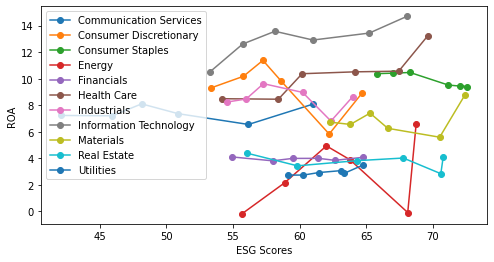

In [24]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],return_on_assets[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("ROA")
plt.show()

#### Return on Equity

In [25]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
return_on_equity=pd.merge(return_on_equity,df,on="Symbol")
return_on_equity=return_on_equity.groupby(['GICS Sector Name']).mean()
return_on_equity=return_on_equity.T
return_on_equity = return_on_equity.iloc[::-1].reset_index(drop=True)

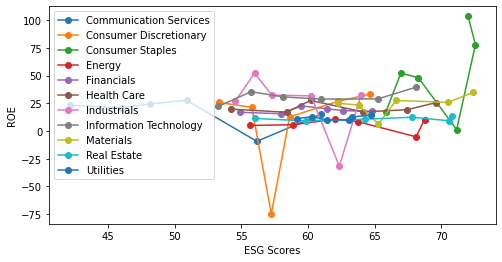

In [26]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],return_on_equity[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("ROE")
plt.show()

#### Return on Investment Capital

In [27]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
return_on_investment_capital=pd.merge(return_on_investment_capital,df,on="Symbol")
return_on_investment_capital=return_on_investment_capital.groupby(['GICS Sector Name']).mean()
return_on_investment_capital=return_on_investment_capital.T
return_on_investment_capital = return_on_investment_capital.iloc[::-1].reset_index(drop=True)

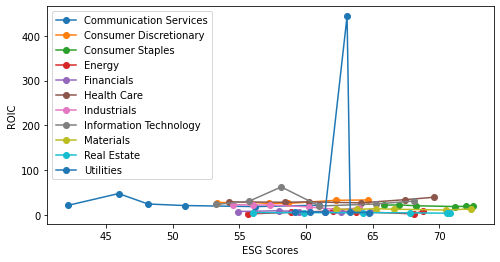

In [28]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],return_on_investment_capital[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("ROIC")
plt.show()

#### EBITDA

In [29]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
ebitda=pd.merge(ebitda,df,on="Symbol")
ebitda=ebitda.groupby(['GICS Sector Name']).mean()
ebitda=ebitda.T
ebitda = ebitda.iloc[::-1].reset_index(drop=True)

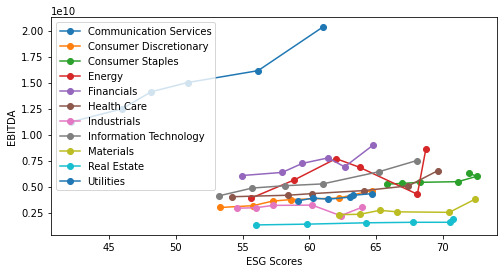

In [30]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],ebitda[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("EBITDA")
plt.show()

# Finding Correlation for  Equity Valuation Variables

### Merging the  dataframe based on symbols

In [31]:
df1=pd.merge(eps,dps,on=['Symbol'])
df1=df1.rename(columns={"2021_x":"EPS_2021","2020_x":"EPS_2020","2019_x":"EPS_2019","2018_x":"EPS_2018",
                        "2017_x":"EPS_2017","2016_x":"EPS_2016","2021_y":"DPS_2021","2020_y":"DPS_2020","2019_y":"DPS_2019",
                        "2018_y":"DPS_2018",
                        "2017_y":"DPS_2017","2016_y":"DPS_2016"})
#DY
df2=pd.merge(df1,DY,on="Symbol")
df2=df2.rename(columns={"2021":"DY_2021","2020":"DY_2020","2019":"DY_2019","2018":"DY_2018","2017":"DY_2017","2016":"DY_2016"})

#per
df3=pd.merge(df2,per,on="Symbol")
df3=df3.rename(columns={"2021":"PER_2021","2020":"PER_2020","2019":"PER_2019","2018":"PER_2018","2017":"PER_2017","2016":"PER_2016"})

#ev
df4=pd.merge(df3,EV,on="Symbol")
df4=df4.rename(columns={"2021":"EV_2021","2020":"EV_2020","2019":"EV_2019","2018":"EV_2018","2017":"EV_2017","2016":"EV_2016"})

#Price_to_sales
df5=pd.merge(df4,price_to_sales,on="Symbol")
df5=df5.rename(columns={"2021":"PTS_2021","2020":"PTS_2020","2019":"PTS_2019","2018":"PTS_2018","2017":"PTS_2017","2016":"PTS_2016"})

#pbv
df6=pd.merge(df5,pbv,on="Symbol")
df6=df6.rename(columns={"2021":"PBV_2021","2020":"PBV_2020","2019":"PBV_2019","2018":"PBV_2018","2017":"PBV_2017","2016":"PBV_2016"})

#esg and industry name
df7=pd.merge(df6,esg_scores,on="Symbol")
df7=df7.rename(columns={"2021":"esg_score_2021","2020":"esg_score_2020","2019":"esg_score_2019","2018":"esg_score_2018","2017":"esg_score_2017","2016":"esg_score_2016"})
final1=pd.merge(df7,df,on="Symbol")

In [32]:
final1

,Symbol,EPS_2021,EPS_2020,EPS_2019,EPS_2018,EPS_2017,EPS_2016,DPS_2021,DPS_2020,DPS_2019,DPS_2018,DPS_2017,DPS_2016,DY_2021,DY_2020,DY_2019,DY_2018,DY_2017,DY_2016,PER_2021,PER_2020,PER_2019,PER_2018,PER_2017,PER_2016,EV_2021,EV_2020,EV_2019,EV_2018,EV_2017,EV_2016,PTS_2021,PTS_2020,PTS_2019,PTS_2018,PTS_2017,PTS_2016,PBV_2021,PBV_2020,PBV_2019,PBV_2018,PBV_2017,PBV_2016,esg_score_2016,esg_score_2017,esg_score_2018,esg_score_2019,esg_score_2020,esg_score_2021,GICS Sector Name
0,MMM,10.11618,9.35933,7.72005,8.88538,7.92884,8.16228,5.920,5.88,5.76,5.440,4.700,4.44,3.332770,3.364037,3.264936,2.855044,1.996856,1.996856,17.396337,20.285993,21.113857,20.975434,26.272814,22.491709,1.140789e+11,1.159227e+11,1.133481e+11,1.212466e+11,1.484903e+11,1.171449e+11,2.875415,3.179323,3.174042,3.348389,4.522786,3.570844,7.078823,8.486759,9.479577,10.826404,11.541930,8.948830,88.128389,87.233512,85.984531,88.540146,92.732718,89.862822,Industrials
1,AOS,3.01947,2.12110,2.21941,2.57965,1.69812,1.84646,0.800,0.98,0.90,0.760,0.560,0.48,1.304601,1.897118,2.015113,2.060890,0.913838,0.913838,29.735721,28.252926,19.824311,17.485381,30.103111,25.920776,1.310427e+10,8.475563e+09,7.595054e+09,6.851405e+09,1.023664e+10,7.911191e+09,4.045136,3.148153,2.544169,2.308176,3.600520,3.134436,7.322928,5.094843,4.837038,4.173793,6.380035,5.459306,39.338609,40.234916,41.063622,53.695534,53.966301,53.966301,Industrials
2,ABT,3.95249,2.51680,2.07019,1.33785,0.27273,0.94403,1.800,1.44,1.28,1.120,1.060,1.04,1.335797,1.643986,1.657840,1.769667,1.962502,1.962502,34.685699,58.247107,46.956428,54.793379,47.052519,57.765479,2.577897e+11,2.080969e+11,1.685721e+11,1.432366e+11,1.123481e+11,6.015241e+10,5.882308,6.022652,4.898997,4.178527,3.952259,2.730897,7.229932,6.182880,4.827861,4.137293,3.101151,2.721958,79.345189,81.993237,77.683987,80.952100,82.965995,82.203654,Health Care
3,ABBV.K,6.45357,2.72325,5.28437,3.65912,3.29570,3.63151,5.200,4.72,4.28,3.590,2.560,2.35,4.165436,4.853010,5.330924,4.642586,2.936615,2.936615,32.229654,23.428037,39.643238,18.154678,23.489379,16.947960,3.078700e+11,2.682620e+11,1.586929e+11,1.703967e+11,1.826317e+11,1.311237e+11,4.338868,4.652742,3.983903,4.308376,5.660936,4.031523,17.665022,12.387120,-15.916772,-47.472968,23.083756,15.729126,75.116025,79.487007,75.537190,78.774658,81.510916,82.819108,Health Care
4,ABMD.O,2.97520,4.93771,4.43096,5.61236,2.44651,1.16700,0.000,0.00,0.00,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.435013,71.164378,35.625009,70.750384,92.201652,116.988694,1.569077e+10,1.412873e+10,7.250479e+09,1.423522e+10,8.039312e+09,4.671926e+09,16.783839,18.262072,9.381871,21.218041,16.420549,12.673438,11.802279,12.390433,7.783810,18.461724,13.694594,12.254841,21.013227,25.892601,20.548131,20.890800,25.319605,25.963587,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,5.21523,2.94463,4.13419,4.68693,3.77465,4.10750,2.000,1.88,1.68,1.440,0.900,1.73,1.440300,1.731761,1.667825,1.566580,1.470408,1.470408,26.782132,31.582193,27.995486,15.409013,46.068564,20.398500,5.102246e+10,4.279609e+10,4.041701e+10,3.828078e+10,3.643905e+10,2.959046e+10,6.323514,5.844921,5.579018,5.030101,16.045539,3.744556,-5.197306,-4.140058,-3.769444,-3.857731,-4.519815,-12.559114,64.074647,78.807757,82.363311,72.703976,78.144823,77.756865,Consumer Discretionary
499,ZBRA.O,15.52806,9.34835,10.07571,7.75325,0.31664,-2.65611,0.000,0.00,0.00,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.959208,43.718427,28.293506,22.690481,182.313164,182.313164,3.247680e+10,2.201909e+10,1.528051e+10,1.043291e+10,7.918029e+09,7.151904e+09,5.814338,4.730170,3.113885,2.088607,1.517600,1.263521,11.298247,10.608077,8.149821,7.062650,6.782803,6.055491,26.308357,29.382888,24.933099,33.306346,42.941130,42.941130,Information Technology
500,ZBH,1.90875,-0.67101,5.47

### Grouping Equity Variation variables and taking mean of Symbols (companies)

In [33]:
new_df1=final1.groupby(['GICS Sector Name']).mean()
new_df1

,EPS_2021,EPS_2020,EPS_2019,EPS_2018,EPS_2017,EPS_2016,DPS_2021,DPS_2020,DPS_2019,DPS_2018,DPS_2017,DPS_2016,DY_2021,DY_2020,DY_2019,DY_2018,DY_2017,DY_2016,PER_2021,PER_2020,PER_2019,PER_2018,PER_2017,PER_2016,EV_2021,EV_2020,EV_2019,EV_2018,EV_2017,EV_2016,PTS_2021,PTS_2020,PTS_2019,PTS_2018,PTS_2017,PTS_2016,PBV_2021,PBV_2020,PBV_2019,PBV_2018,PBV_2017,PBV_2016,esg_score_2016,esg_score_2017,esg_score_2018,esg_score_2019,esg_score_2020,esg_score_2021
GICS Sector Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Communication Services,4.616530,2.828849,2.655571,2.874742,3.853283,2.371748,0.559417,0.535000,0.530417,0.585958,0.558125,0.532083,1.564130,1.638306,1.446476,1.853890,1.601292,1.601292,1145.825577,1149.707663,1143.312856,1139.133937,1151.626782,1183.889437,2.881702e+11,2.249688e+11,1.813136e+11,1.395574e+11,1.461382e+11,1.202411e+11,3.942398,4.341796,3.013661,2.662041,3.394262,3.024002,-21.338732,-3.720986,5.335083,4.250058,5.110661,4.719905,42.116113,45.938019,48.145662,50.889132,56.159108,60.992933
Consumer Discretionary,14.518701,8.023158,11.701506,9.748891,7.652304,6.724228,1.304286,1.063804,1.345982,1.246429,1.112089,1.071250,0.958873,0.834821,1.693410,1.987850,1.481677,1.481677,60.378748,90.212932,49.902048,47.126885,57.274051,56.415016,1.079391e+11,8.880670e+10,6.057873e+10,5.018703e+10,4.957828e+10,3.970823e+10,5.560723,3.744402,2.267821,2.009879,2.467713,2.081826,1.543874,11.237702,2.736398,9.431807,7.201442,2.241134,53.322957,55.783787,57.243923,58.622350,62.214308,64.678745
Consumer Staples,3.865019,3.796959,3.163766,3.694906,4.094779,3.531353,2.163000,2.050000,1.982273,1.905424,1.850848,1.690273,2.474189,2.511224,2.546898,2.915131,2.267450,2.267450,30.863336,37.897987,30.609727,21.293766,24.974505,30.182340,9.573879e+10,8.643563e+10,8.153051e+10,6.814716e+10,7.370673e+10,6.707990e+10,3.231679,3.273813,2.997088,2.625153,2.972656,2.746091,12.511721,15.762363,-4.927708,-8.373510,-7.495922,-1.168096,65.820454,66.965104,68.277814,71.148197,72.555707,72.003244
Energy,3.786549,-6.641999,0.787521,3.177367,1.991033,-2.006534,1.852478,1.640000,1.793696,1.617174,1.441739,1.423913,2.872798,3.828946,3.495571,3.445941,2.450020,2.450020,48.959840,69.796280,35.108793,591.845606,935.589795,936.375260,6.352745e+10,4.783707e+10,6.418950e+10,5.792569e+10,6.908292e+10,6.979390e+10,2.945711,1.634738,1.887043,1.875293,3.321899,4.219390,1.827726,1.396724,1.803520,1.728698,2.420177,4.838314,55.660385,58.877969,62.006156,63.774476,68.105955,68.736996
Financials,898.206023,404.199612,750.710710,42.404157,412.774621,223.100259,2.306965,2.186642,2.032906,1.754322,1.574784,1.367106,1.889374,2.245102,2.177570,2.488071,1.671777,1.671777,18.478909,22.039589,18.892309,15.066751,23.023154,22.126612,1.090804e+11,9.364650e+10,1.032686e+11,8.564370e+10,9.214085e+10,8.257553e+10,5.542265,4.361586,4.098910,3.418881,4.457552,4.157557,1.523656,4.126947,4.498906,4.201800,2.399496,2.912161,54.932235,57.969427,59.472167,61.410766,62.647695,64.785931
Health Care,12.128132,8.418572,6.742914,5.069494,3.585544,4.134226,1.257891,1.097500,1.035531,0.949531,0.841156,0.775859,0.942552,0.972425,0.989942,1.063741,0.981244,0.981244,37.062905,41.073668,41.351262,32.917392,45.475172,39.874936,9.410086e+10,7.680813e+10,6.713049e+10,5.682050e+10,5.285579e+10,4.423373e+10,6.189596,8.578246,6.195681,4.770979,4.881502,4.198180,12.552891,1.859132,10.097944,-152.307278,1.209906,8.032486,54.204420,58.401301,60.184412,64.128288,67.433076,69.620272
Industrials,6.673869,3.825742,5.531564,5.585757,4.901485,4.237539,2.309708,1.943259,2.413343,1.800324,1.660548,2.152122,1.113678,1.224501,1.457012,1.720014,1.356338,1.356338,30.293318,32.744973,29.273569,19.402646,27.614983,23.922492,5.170934e+10,4.441949e+10,4.165094e+10,3.544144e+10,4.027343e+10,3.486095e+10,3.828141,3.750133,2.939995,2.301181,3.008685,2.762461,4.022237,7.280003,5.040537,6.325632,7.448157,4.529608,54.549037,55.984743,57.284346,60.218467,62.346407,63.982725
Information Technology,6.357419,4.537650,3.563957,3

In [34]:
y=['esg_score_2016', 'esg_score_2017','esg_score_2018', 'esg_score_2019', 'esg_score_2020', 'esg_score_2021']
lis1=['EPS_2016', 'EPS_2017', 'EPS_2018', 'EPS_2019', 'EPS_2020', 'EPS_2021']
lis2=['DPS_2016', 'DPS_2017', 'DPS_2018', 'DPS_2019', 'DPS_2020', 'DPS_2021']
lis3=['DY_2016', 'DY_2017', 'DY_2018', 'DY_2019', 'DY_2020', 'DY_2021']
lis4=['PER_2016', 'PER_2017', 'PER_2018', 'PER_2019', 'PER_2020', 'PER_2021']
lis5=['EV_2016', 'EV_2017', 'EV_2018', 'EV_2019', 'EV_2020', 'EV_2021']
lis6=['PTS_2016', 'PTS_2017', 'PTS_2018', 'PTS_2019', 'PTS_2020', 'PTS_2021']
lis7=['PBV_2016', 'PBV_2017', 'PBV_2018', 'PBV_2019', 'PBV_2020', 'PBV_2021']
new_df1['EPS_corr']=get_corr(new_df1,lis1,y)
new_df1['DPS_corr']=get_corr(new_df1,lis2,y)
new_df1['DY_corr']=get_corr(new_df1,lis3,y)
new_df1['PER_corr']=get_corr(new_df1,lis4,y)
new_df1['EV_corr']=get_corr(new_df1,lis5,y)
new_df1['PTS_corr']=get_corr(new_df1,lis6,y)
new_df1['PBV_corr']=get_corr(new_df1,lis7,y)
new_df1

,EPS_2021,EPS_2020,EPS_2019,EPS_2018,EPS_2017,EPS_2016,DPS_2021,DPS_2020,DPS_2019,DPS_2018,DPS_2017,DPS_2016,DY_2021,DY_2020,DY_2019,DY_2018,DY_2017,DY_2016,PER_2021,PER_2020,PER_2019,PER_2018,PER_2017,PER_2016,EV_2021,EV_2020,EV_2019,EV_2018,EV_2017,EV_2016,PTS_2021,PTS_2020,PTS_2019,PTS_2018,PTS_2017,PTS_2016,PBV_2021,PBV_2020,PBV_2019,PBV_2018,PBV_2017,PBV_2016,esg_score_2016,esg_score_2017,esg_score_2018,esg_score_2019,esg_score_2020,esg_score_2021,EPS_corr,DPS_corr,DY_corr,PER_corr,EV_corr,PTS_corr,PBV_corr
GICS Sector Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Communication Services,4.616530,2.828849,2.655571,2.874742,3.853283,2.371748,0.559417,0.535000,0.530417,0.585958,0.558125,0.532083,1.564130,1.638306,1.446476,1.853890,1.601292,1.601292,1145.825577,1149.707663,1143.312856,1139.133937,1151.626782,1183.889437,2.881702e+11,2.249688e+11,1.813136e+11,1.395574e+11,1.461382e+11,1.202411e+11,3.942398,4.341796,3.013661,2.662041,3.394262,3.024002,-21.338732,-3.720986,5.335083,4.250058,5.110661,4.719905,42.116113,45.938019,48.145662,50.889132,56.159108,60.992933,0.584745,0.045913,-0.185713,-0.568534,0.977683,0.719840,-0.861492
Consumer Discretionary,14.518701,8.023158,11.701506,9.748891,7.652304,6.724228,1.304286,1.063804,1.345982,1.246429,1.112089,1.071250,0.958873,0.834821,1.693410,1.987850,1.481677,1.481677,60.378748,90.212932,49.902048,47.126885,57.274051,56.415016,1.079391e+11,8.880670e+10,6.057873e+10,5.018703e+10,4.957828e+10,3.970823e+10,5.560723,3.744402,2.267821,2.009879,2.467713,2.081826,1.543874,11.237702,2.736398,9.431807,7.201442,2.241134,53.322957,55.783787,57.243923,58.622350,62.214308,64.678745,0.727071,0.390239,-0.673997,0.478713,0.979005,0.886791,0.042210
Consumer Staples,3.865019,3.796959,3.163766,3.694906,4.094779,3.531353,2.163000,2.050000,1.982273,1.905424,1.850848,1.690273,2.474189,2.511224,2.546898,2.915131,2.267450,2.267450,30.863336,37.897987,30.609727,21.293766,24.974505,30.182340,9.573879e+10,8.643563e+10,8.153051e+10,6.814716e+10,7.370673e+10,6.707990e+10,3.231679,3.273813,2.997088,2.625153,2.972656,2.746091,12.511721,15.762363,-4.927708,-8.373510,-7.495922,-1.168096,65.820454,66.965104,68.277814,71.148197,72.555707,72.003244,-0.122460,0.927993,0.293117,0.621672,0.880316,0.791039,0.710686
Energy,3.786549,-6.641999,0.787521,3.177367,1.991033,-2.006534,1.852478,1.640000,1.793696,1.617174,1.441739,1.423913,2.872798,3.828946,3.495571,3.445941,2.450020,2.450020,48.959840,69.796280,35.108793,591.845606,935.589795,936.375260,6.352745e+10,4.783707e+10,6.418950e+10,5.792569e+10,6.908292e+10,6.979390e+10,2.945711,1.634738,1.887043,1.875293,3.321899,4.219390,1.827726,1.396724,1.803520,1.728698,2.420177,4.838314,55.660385,58.877969,62.006156,63.774476,68.105955,68.736996,-0.080229,0.833572,0.656763,-0.912031,-0.687106,-0.672520,-0.806293
Financials,898.206023,404.199612,750.710710,42.404157,412.774621,223.100259,2.306965,2.186642,2.032906,1.754322,1.574784,1.367106,1.889374,2.245102,2.177570,2.488071,1.671777,1.671777,18.478909,22.039589,18.892309,15.066751,23.023154,22.126612,1.090804e+11,9.364650e+10,1.032686e+11,8.564370e+10,9.214085e+10,8.257553e+10,5.542265,4.361586,4.098910,3.418881,4.457552,4.157557,1.523656,4.126947,4.498906,4.201800,2.399496,2.912161,54.932235,57.969427,59.472167,61.410766,62.647695,64.785931,0.690324,0.989220,0.412564,-0.332898,0.839650,0.545822,-0.061108
Health Care,12.128132,8.418572,6.742914,5.069494,3.585544,4.134226,1.257891,1.097500,1.035531,0.949531,0.841156,0.775859,0.942552,0.972425,0.989942,1.063741,0.981244,0.981244,37.062905,41.073668,41.351262,32.917392,45.475172,39.874936,9.410086e+10,7.680813e+10,6.713049e+10,5.682050e+10,5.285579e+10,4.423373e+10,6.189596,8.578246,6.195681,4.770979,4.881502,4.198180,12.552891,1.859132,10.097944,-152.307278,1.209906,8.032486,54.204420,58.401301,60.184412,64.128288,67.433076,69.620272,0.913773,0.977474,-0.417078,-0.151927,0.971912,0.796834,0.198898
Industrials,6.673869,3.825742,5.531564,5.585757,4.901485,4.237539,2.309

In [81]:
new=new_df1[['EPS_corr', 'DPS_corr', 'DY_corr','PER_corr', 'EV_corr', 'PTS_corr', 'PBV_corr']].copy()
new=new.rename(columns={'EPS_corr':"EPS","DPS_corr":"DPS","DY_corr":"DY","PER_corr":"PER",
                       'EV_corr':"EV","PTS_corr":"PTS","PBV_corr":"PBV"})
new

,EPS,DPS,DY,PER,EV,PTS,PBV
GICS Sector Name,,,,,,,
Communication Services,0.584745,0.045913,-0.185713,-0.568534,0.977683,0.719840,-0.861492
Consumer Discretionary,0.727071,0.390239,-0.673997,0.478713,0.979005,0.886791,0.042210
Consumer Staples,-0.122460,0.927993,0.293117,0.621672,0.880316,0.791039,0.710686
Energy,-0.080229,0.833572,0.656763,-0.912031,-0.687106,-0.672520,-0.806293
Financials,0.690324,0.989220,0.412564,-0.332898,0.839650,0.545822,-0.061108
Health Care,0.913773,0.977474,-0.417078,-0.151927,0.971912,0.796834,0.198898
Industrials,0.401504,0.460370,-0.555696,0.703795,0.898784,0.797589,-0.186464
Information Technology,0.947934,0.981428,-0.472020,-0.678229,0.974695,0.966667,0.676940
Materials,0.554193,0.986254,-0.004717,-0.166966,0.913500,0.880243,0.667372


In [85]:
col_names = ['EPS', 'DPS','DY', 'PER', 'EV', 'PTS', 'PBV']
row_names=['Communication Services', 'Consumer Discretionary', 'Consumer Staples',
       'Energy', 'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate', 'Utilities']
for i in range(7):
    cc_ls = new[col_names[i]].to_list()
    print(col_names[i])
    print("=================================")
    for j in range(11):
        cc = cc_ls[j]
        cc = round(cc,2)
        #print(cc)
        if (cc >= 0.8 and cc <= 1):
            print(row_names[j], ": Very Strong Positive (", cc,")")
        elif (cc >= 0.6 and cc <= 0.79):
            print(row_names[j], ": Strong Positive (", cc,")")
        elif (cc >= 0.4 and cc <= 0.59):
            print(row_names[j], ": Moderate Positive (", cc,")")
        elif (cc >= 0.2 and cc <= 0.39):
            print(row_names[j], ": Weak Positive (", cc,")")
        elif (cc >= 0 and cc < 0.19):
            print(row_names[j], ": Very Weak Positive (", cc,")")
        elif (cc >= -1 and cc <= -0.8):
            print(row_names[j], ": Very Strong Negative (", cc,")")
        elif (cc >= -0.79 and cc <= -0.6):
            print(row_names[j], ": Strong Negative (", cc,")")
        elif (cc >= -0.59 and cc <= -0.4):
            print(row_names[j], ": Moderate Negative (", cc,")")
        elif (cc >= -0.39 and cc <= -0.2):
            print(row_names[j], ": Weak Negative (", cc,")")
        elif (cc >= -0.19 and cc <= -0.01):
            print(row_names[j], ": Very Weak Negative (", cc,")")
            
    print()

EPS
Communication Services : Moderate Positive ( 0.58 )
Consumer Discretionary : Strong Positive ( 0.73 )
Consumer Staples : Very Weak Negative ( -0.12 )
Energy : Very Weak Negative ( -0.08 )
Financials : Strong Positive ( 0.69 )
Health Care : Very Strong Positive ( 0.91 )
Industrials : Moderate Positive ( 0.4 )
Information Technology : Very Strong Positive ( 0.95 )
Materials : Moderate Positive ( 0.55 )
Real Estate : Weak Positive ( 0.35 )
Utilities : Very Strong Positive ( 0.94 )

DPS
Communication Services : Very Weak Positive ( 0.05 )
Consumer Discretionary : Weak Positive ( 0.39 )
Consumer Staples : Very Strong Positive ( 0.93 )
Energy : Very Strong Positive ( 0.83 )
Financials : Very Strong Positive ( 0.99 )
Health Care : Very Strong Positive ( 0.98 )
Industrials : Moderate Positive ( 0.46 )
Information Technology : Very Strong Positive ( 0.98 )
Materials : Very Strong Positive ( 0.99 )
Real Estate : Strong Positive ( 0.66 )
Utilities : Very Strong Positive ( 0.98 )

DY
Communica

#### Correlation Analysis
In the above table, negative numbers shows increase in Environment, Social and Governance scores decreases the scores of other variables, whereas positive correlation shows increase in ESG scores increase the other ratios.


#### Diluted earnings per share (EPS):
There is an increase in EPS ratios with increase in ESG scores for all sectors except Consumer Staple and Energy which shows negative trend with respect to ESG scores


#### Dividend per share (DPS):
It showed positive correlation of ESG scores for rest of all of the sectors. All the sectors DPS increased with increase in ESG scores.


#### Dividend yield (DY) :
There is negative trend between ESG scores and all the sectors for Dividend Yield, except 'Consumer Staples', 'Energy', 'Financials', 'Materials'.


####  Price to earnings ratio (PER):
Overall, there is increase in Price to Earnings ratios (PER) for sectors 'Consumer Discretionary','Consumer Staples', 'Industrials','Real Estate', and 'Utilities' with increase in ESG scores, whereas the rest of the sectors shows decreasing trend with increase in ESG scores. 


####  Enterprise value (EV):
Overall, there is increase in Enterprise Value ratios for all sectors with increase in ESG score, except 'Energy' sector.


####  Price to sales per share ratio:
Price to sales per share shows similar trend as EV i.e.,  there is increase in price to sales per share ratios for all sectors with increase in ESG score except 'Energy' sector.

#### Price to book value (P/BV):
Overall, there is increase in Price to Book ratios for sectors 'Consumer Discretionary','Consumer Staples','Health Care', 'Information Technology','Materials','Real Estate', and 'Utilities' with increase in ESG scores whereas the rest of the sectors shows decreasing trend with increase in ESG scores. 




### Graphs for ESG Scores vs. Equity Valuation Variables grouped by sectors

#### EPS

In [36]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
eps=pd.merge(eps,df,on="Symbol")
eps=eps.groupby(['GICS Sector Name']).mean()
eps=eps.T
eps = eps.iloc[::-1].reset_index(drop=True)

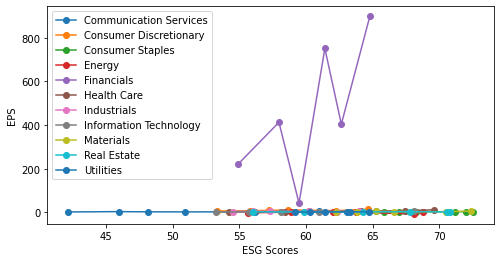

In [37]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],eps[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("EPS")
plt.show()

#### DPS

In [38]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
dps=pd.merge(dps,df,on="Symbol")
dps=dps.groupby(['GICS Sector Name']).mean()
dps=dps.T
dps = dps.iloc[::-1].reset_index(drop=True)

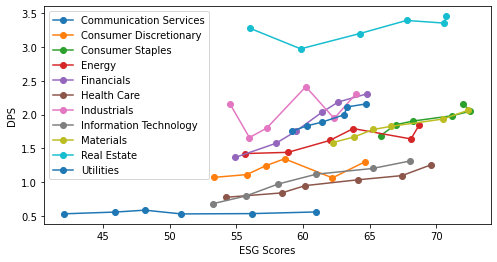

In [39]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],dps[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("DPS")
plt.show()

### DY

In [40]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
DY=pd.merge(DY,df,on="Symbol")
DY=DY.groupby(['GICS Sector Name']).mean()
DY=DY.T
DY = DY.iloc[::-1].reset_index(drop=True)

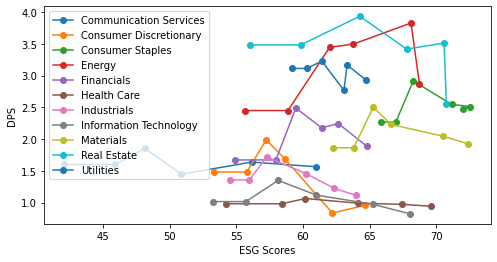

In [41]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],DY[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("DPS")
plt.show()

#### PER

In [42]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
per=pd.merge(per,df,on="Symbol")
per=per.groupby(['GICS Sector Name']).mean()
per=per.T
per = per.iloc[::-1].reset_index(drop=True)

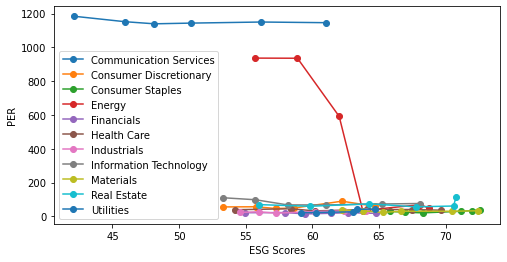

In [43]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],per[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("PER")
plt.show()

#### EV

In [44]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
EV=pd.merge(EV,df,on="Symbol")
EV=EV.groupby(['GICS Sector Name']).mean()
EV=EV.T
EV = EV.iloc[::-1].reset_index(drop=True)

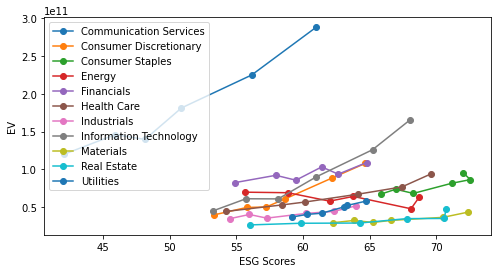

In [45]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],EV[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("EV")
plt.show()

#### Price-to-Sales

In [46]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
price_to_sales=pd.merge(price_to_sales,df,on="Symbol")
price_to_sales=price_to_sales.groupby(['GICS Sector Name']).mean()
price_to_sales=price_to_sales.T
price_to_sales = price_to_sales.iloc[::-1].reset_index(drop=True)

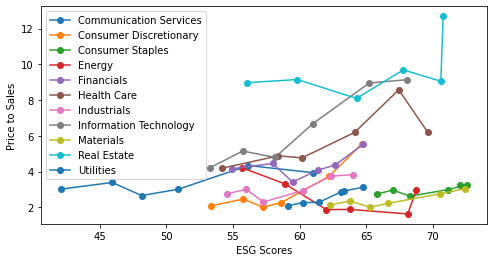

In [47]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],price_to_sales[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("Price to Sales")
plt.show()

#### Price to Book Value

In [48]:
year = ['2016', '2017', '2018', '2019', '2020', '2021']
pbv=pd.merge(pbv,df,on="Symbol")
pbv=pbv.groupby(['GICS Sector Name']).mean()
pbv=pbv.T
pbv = pbv.iloc[::-1].reset_index(drop=True)

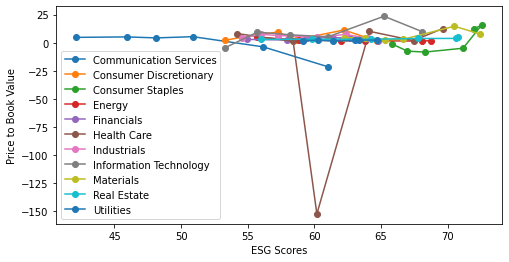

In [49]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    ax1.plot(ESG[i],pbv[i],label=i,marker="o")
ax1.legend(loc='best')
ax1.set_xlabel("ESG Scores")
ax1.set_ylabel("Price to Book Value")
plt.show()

## Finding Cumulative Frequency and plotting it on Graph

In [50]:
ESG=new_df[['esg_score_2016',
       'esg_score_2017', 'esg_score_2018', 'esg_score_2019', 'esg_score_2020',
       'esg_score_2021']]
ESG=ESG.T
ESG.rename(index={'esg_score_2016':"2016",'esg_score_2017':"2017",'esg_score_2018':"2018","esg_score_2019":"2019",
                'esg_score_2020':"2020",'esg_score_2021':"2021",'esg_score_2022':"2022"},inplace=True)
ESG

GICS Sector Name,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2016,42.116113,53.322957,65.820454,55.660385,54.932235,54.204420,54.549037,53.259022,62.248751,56.019472,59.149996
2017,45.938019,55.783787,66.965104,58.877969,57.969427,58.401301,55.984743,55.726586,63.806043,59.832045,60.281725
2018,48.145662,57.243923,68.277814,62.006156,59.472167,60.184412,57.284346,58.144585,65.279400,64.265204,61.423506
2019,50.889132,58.622350,71.148197,63.774476,61.410766,64.128288,60.218467,60.999489,66.611514,67.774580,63.077383
2020,56.159108,62.214308,72.555707,68.105955,62.647695,67.433076,62.346407,65.220919,70.500603,70.587774,63.313959
2021,60.992933,64.678745,72.003244,68.736996,64.785931,69.620272,63.982725,68.064101,72.395096,70.763059,64.724891


In [51]:
Industries=['Communication Services', 'Consumer Discretionary', 'Consumer Staples',
       'Energy', 'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate', 'Utilities']
for i in range(0,len(Industries)):
    x=Industries[i]+"_CF"
    ESG[x]=ESG[Industries[i]].cumsum(axis=0)

In [52]:
ESG

GICS Sector Name,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities,Communication Services_CF,Consumer Discretionary_CF,Consumer Staples_CF,Energy_CF,Financials_CF,Health Care_CF,Industrials_CF,Information Technology_CF,Materials_CF,Real Estate_CF,Utilities_CF
2016,42.116113,53.322957,65.820454,55.660385,54.932235,54.204420,54.549037,53.259022,62.248751,56.019472,59.149996,42.116113,53.322957,65.820454,55.660385,54.932235,54.204420,54.549037,53.259022,62.248751,56.019472,59.149996
2017,45.938019,55.783787,66.965104,58.877969,57.969427,58.401301,55.984743,55.726586,63.806043,59.832045,60.281725,88.054132,109.106744,132.785558,114.538354,112.901663,112.605720,110.533779,108.985607,126.054794,115.851516,119.431721
2018,48.145662,57.243923,68.277814,62.006156,59.472167,60.184412,57.284346,58.144585,65.279400,64.265204,61.423506,136.199794,166.350667,201.063372,176.544511,172.373830,172.790132,167.818125,167.130192,191.334194,180.116720,180.855227
2019,50.889132,58.622350,71.148197,63.774476,61.410766,64.128288,60.218467,60.999489,66.611514,67.774580,63.077383,187.088926,224.973017,272.211569,240.318987,233.784596,236.918420,228.036592,228.129681,257.945708,247.891300,243.932610
2020,56.159108,62.214308,72.555707,68.105955,62.647695,67.433076,62.346407,65.220919,70.500603,70.587774,63.313959,243.248033,287.187324,344.767276,308.424942,296.432291,304.351495,290.382999,293.350600,328.446311,318.479074,307.246569
2021,60.992933,64.678745,72.003244,68.736996,64.785931,69.620272,63.982725,68.064101,72.395096,70.763059,64.724891,304.240967,351.866069,416.770521,377.161938,361.218223,373.971767,354.365724,361.414701,400.841407,389.242133,371.971460


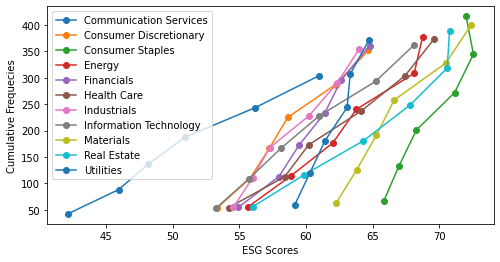

In [53]:
fig=plt.figure(figsize=(8,4))
ax1=plt.subplot(111)
for i in Industries:
    Com=i+"_CF"
    ax1.plot(ESG[i],ESG[Com],label=i,marker="o")
ax1.legend(loc='best')
plt.xlabel("ESG Scores")
plt.ylabel("Cumulative Frequecies")
plt.show()

From the above plot, we can conclude that over the 6 years there is drastically increase in ESG scores for sector Communication Services. The sector 'Consumer Staples' has more companies with the highest ESG scores than others since year 2016 to 2021 while there is moderate change in ESG scores for rest of the sectors.

### Quartile Table

In [54]:
ESG_Data=final[['Symbol','GICS Sector Name','esg_score_2016',
       'esg_score_2017', 'esg_score_2018', 'esg_score_2019', 'esg_score_2020',
       'esg_score_2021']]
ESG_Data=ESG_Data.rename(columns={'esg_score_2016':"2016",'esg_score_2017':"2017",'esg_score_2018':"2018","esg_score_2019":"2019",
                'esg_score_2020':"2020",'esg_score_2021':"2021",'esg_score_2022':"2022"})

In [55]:
cols = ['2021', '2020','2019', '2018', '2017','2016']
ESG_Data.loc[:,cols] = ESG_Data.loc[:,cols].fillna(method='ffill', axis = 1)
ESG_Data.loc[:,cols] = ESG_Data.loc[:,cols].fillna(method='bfill', axis = 1)
ESG_Data = ESG_Data.fillna(0)
ESG_Data

,Symbol,GICS Sector Name,2016,2017,2018,2019,2020,2021
0,MMM,Industrials,88.128389,87.233512,85.984531,88.540146,92.732718,89.862822
1,AOS,Industrials,39.338609,40.234916,41.063622,53.695534,53.966301,53.966301
2,ABT,Health Care,79.345189,81.993237,77.683987,80.952100,82.965995,82.203654
3,ABBV.K,Health Care,75.116025,79.487007,75.537190,78.774658,81.510916,82.819108
4,ABMD.O,Health Care,21.013227,25.892601,20.548131,20.890800,25.319605,25.963587
...,...,...,...,...,...,...,...,...
498,YUM,Consumer Discretionary,64.074647,78.807757,82.363311,72.703976,78.144823,77.756865
499,ZBRA.O,Information Technology,26.308357,29.382888,24.933099,33.306346,42.941130,42.941130
500,ZBH,Health Care,45.966653,40.606044,45.582277,63.744334,62.925379,68.032669
501,ZION.O,Financials,35.764204,35.879043,38.087569,45.462987,54.258814,51.913269


In [56]:
def find_quartiles(ESG_Data,Industries):
    Q1=[]
    Q2=[]
    Q3=[]
    cols=['2016', '2017', '2018', '2019', '2020','2021']
    f=[]
    for i in Industries:
        temp=[i]
        x=ESG_Data[ESG_Data['GICS Sector Name']==i]
        for j in cols:
            l=x[j].to_numpy()
            q25=np.quantile(l, .25)
            q50=np.quantile(l, .50)
            q75=np.quantile(l, .75)

            temp.append(q25)
            temp.append(q50)
            temp.append(q75)
        f.append(temp)
    col_names=['GICS Sector Name', '2016(Q1)','2016(Q2)','2016(Q3)','2017(Q1)','2017(Q2)','2017(Q3)',
               '2018(Q1)','2018(Q2)','2018(Q3)','2019(Q1)','2019(Q2)','2019(Q3)','2020(Q1)','2020(Q2)','2020(Q3)',
               '2021(Q1)','2021(Q2)','2021(Q3)',] 
    df2 = pd.DataFrame(f, columns=col_names)
    df2=df2.set_index("GICS Sector Name")
    return df2


In [57]:
q=find_quartiles(ESG_Data,Industries)
q

,2016(Q1),2016(Q2),2016(Q3),2017(Q1),2017(Q2),2017(Q3),2018(Q1),2018(Q2),2018(Q3),2019(Q1),2019(Q2),2019(Q3),2020(Q1),2020(Q2),2020(Q3),2021(Q1),2021(Q2),2021(Q3)
GICS Sector Name,,,,,,,,,,,,,,,,,,
Communication Services,29.092026,42.589029,58.729490,30.644506,52.647751,61.794782,37.955124,51.669046,64.245429,37.483526,51.408925,67.319981,47.645996,59.283266,69.459545,49.691018,62.392365,73.726397
Consumer Discretionary,42.072279,54.946783,65.325979,42.836309,55.577197,71.646879,45.913048,56.564460,73.417306,46.300710,58.059661,72.187175,53.315159,61.855626,75.644008,57.234783,65.119040,75.845934
Consumer Staples,56.709427,67.687854,75.661739,61.282143,69.154517,74.988523,60.842350,69.921012,76.270645,66.790198,73.056542,79.746698,67.361992,72.965240,79.799634,69.216732,74.094144,81.455118
Energy,41.762943,59.340227,69.327629,47.848118,60.183271,71.730060,48.781382,63.862375,74.391832,52.631090,66.944997,74.901532,58.737543,69.673376,79.305437,58.737543,69.686519,79.814052
Financials,45.117951,52.949639,67.440658,47.184367,57.000456,67.923493,49.632281,58.423589,69.947922,51.092457,61.555783,71.757204,54.371320,60.861534,72.528425,57.513125,64.736977,72.599182
Health Care,40.996011,53.976017,71.365292,45.766441,60.677859,72.635975,46.956594,64.049280,74.379154,55.432116,66.804151,76.887782,61.600015,70.152021,77.703880,65.111425,73.474997,80.200157
Industrials,39.309275,59.515503,69.231384,43.564495,60.685713,69.100605,42.473153,59.761280,70.146552,52.464744,62.017407,70.783676,53.363716,67.006189,74.186400,56.370801,68.879310,72.472417
Information Technology,38.175511,55.250901,69.456127,43.585973,57.691422,70.808333,45.170651,58.837298,71.915908,52.256385,63.889463,72.759470,55.566713,67.018803,75.870970,59.107046,69.752524,77.807105
Materials,53.490097,63.986698,71.781592,56.125878,65.447317,75.893912,52.891391,67.712420,76.424285,55.163336,66.839256,77.013774,62.697283,71.290224,79.217719,64.559928,73.635588,80.145603
